ROC: (array([0.        , 0.01408451, 0.0915493 , 0.18309859, 0.33098592,
       0.5       , 1.        ]), array([0.        , 0.2721519 , 0.65189873, 0.89873418, 0.98101266,
       0.99367089, 1.        ]), array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))
AUC : 0.91


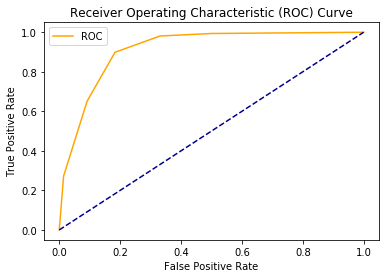

In [20]:
#p617  ROC 그리기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#roc 곡선 과 auc 점수
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr,color= 'orange', label= 'ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle= '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
#p618 ROC 그리기

data_X, class_label= make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

trainX,testX,trainy,testy= train_test_split(data_X,class_label,test_size=0.3,random_state=1)

model=KNeighborsClassifier()
model.fit(trainX,trainy)

probs=model.predict_proba(testX)
probs=probs[:,1]

roc=roc_curve(testy,probs)
print('ROC: {}'.format(roc))

auc=roc_auc_score(testy,probs)
print('AUC : %.2f' % auc)

fpr,tpr,thresholds= roc_curve(testy,probs)
plot_roc_curve(fpr,tpr)


In [34]:
#p621 k겹 교차검증   (k-fold)

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris=load_iris()
KNN=KNeighborsClassifier()
scores=cross_val_score(KNN,iris.data,iris.target)
print("교차 검증 점수:", scores)

scores=cross_val_score(KNN,iris.data, iris.target,cv=5)
print("교차검증 점수: ", scores)

print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

# p622
from sklearn.model_selection import cross_validate
res=cross_validate(KNN,iris.data,iris.target,cv=5,return_train_score=True)

display(res)

교차 검증 점수: [0.98039216 0.98039216 1.        ]
교차검증 점수:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 평균 점수: 0.97


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.00049615, 0.00049472, 0.        , 0.00027061, 0.00049734]),
 'score_time': array([0.00149035, 0.00099325, 0.00098848, 0.00148821, 0.00099087]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

In [39]:
#p625  LOOCV

from sklearn.model_selection import LeaveOneOut
Loo=LeaveOneOut()

scores= cross_val_score(KNN,iris.data,iris.target,cv=10)

print("교차 검증 분할 횟수: ",len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  10
평균 정확도: 0.97


In [52]:
#p626 임의 분할 교차 검증
from sklearn.model_selection import ShuffleSplit
shuffle_split=ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores=cross_val_score(KNN,iris.data, iris.target,cv=shuffle_split)

print("교차 검증 점수: \n", scores)


교차 검증 점수: 
 [0.97333333 0.94666667 0.97333333 0.96       0.97333333 0.96
 0.94666667 0.92       0.96       0.98666667]


In [57]:
#p627  반복 교차 검증

from sklearn.model_selection import cross_val_score, KFold,StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris= load_iris()

KNN=KNeighborsClassifier()

from sklearn.model_selection import RepeatedStratifiedKFold

rskfold=RepeatedStratifiedKFold(random_state=42)
scores=cross_val_score(KNN,iris.data,iris.target,cv=rskfold)

print("교차 검증 점수 \n", scores)
print("교차 검증 평균 점수: {:.3f}".format(scores.mean()))

교차 검증 점수 
 [0.96666667 0.96666667 0.96666667 0.93333333 1.         0.93333333
 1.         0.96666667 0.96666667 0.93333333 0.96666667 0.96666667
 1.         0.96666667 0.93333333 1.         0.96666667 0.96666667
 0.86666667 0.96666667 0.96666667 0.96666667 0.96666667 1.
 0.96666667 1.         0.93333333 0.96666667 0.96666667 0.96666667
 0.93333333 0.96666667 1.         1.         0.96666667 0.9
 0.96666667 0.96666667 1.         1.         0.96666667 0.96666667
 1.         0.93333333 0.93333333 0.96666667 0.96666667 0.93333333
 1.         0.96666667]
교차 검증 평균 점수: 0.965


In [44]:
#p628 간단한 그리드 서치구현

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print("훈련 세트의 크기: {} 테스트 세트의 크기: {} ".format(X_train.shape[0],
                                             X_test.shape[0]))

best_score=0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #매개변수의 각 조합에 대해 svc 훈련
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train, y_train)
        
        #테스트 세트로 svc를 평가
        
        score=svm.score(X_test,y_test)
        
        #점수가 더 높으면 매개변수와 기록
        
        if score > best_score:
            best_score=score
            best_parameters={'C':C , 'gamma':gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 매개변수: ",best_parameters)



훈련 세트의 크기: 112 테스트 세트의 크기: 38 
최고 점수: 0.97
최적 매개변수:  {'C': 100, 'gamma': 0.001}


In [47]:
#p630 매개변수 과대적합과 검증세트
# 데이터를 훈련+검증 세트 ,테스트 세트로 분할
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)


#훈련+검증 세트를 훈련세트와 검증세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,y_trainval, random_state=1)


print("훈련 세트의 크기: {} 테스트 세트의 크기: {} ".format(X_train.shape[0],X_test.shape[0],
                                             X_test.shape[0]))

best_score=0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        #매개변수의 각 조합에 대해 svc 훈련
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train, y_train)
        
        #테스트 세트로 svc를 평가
        
        score=svm.score(X_valid,y_valid)
        
        #점수가 더 높으면 매개변수와 기록
        
        if score > best_score:
            best_score=score
            best_parameters={'C':C , 'gamma':gamma}
 
        #훈련 세트와 검증 세트를 합쳐 모델 다시 만후 테스트 세트 사용하고 평가

svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score=svm.score(X_test,y_test)

print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 매개변수: ",best_parameters)
print("최적 매개변수에서 테스트 세트 점수: {:.2f}".format(test_score))


훈련 세트의 크기: 84 테스트 세트의 크기: 38 
검증 세트에서 최고 점수: 0.96
최적 매개변수:  {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수: 0.92
